In [1]:
import pandas as pd
import numpy as np
import os
import cv2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
animal = 'DK55'
section = 164
CH='CH3'
DIR = '/data/cell_segmentation/DK55'
INPUT= '%s/%s/%d'%(DIR,CH,section)
!ls $INPUT
INPUT

164.csv        164tile-2.tif  164tile-5.tif  164tile-8.tif
164tile-0.tif  164tile-3.tif  164tile-6.tif  164tile-9.tif
164tile-1.tif  164tile-4.tif  164tile-7.tif  DK55_premotor_164_2021-10-11.csv


'/data/cell_segmentation/DK55/CH3/164'

In [4]:
from glob import glob
import os
 
### All the csv files seem to be empty.
%cd $DIR/
i=0
for file in glob('CH3/*/*.csv'):
    i+=1
    file_size = os.path.getsize(file)
    if file_size>0:
        print(file," Size is :", file_size, "bytes")
print('checked',i,'files')

/data/cell_segmentation/DK55
CH3/164/164.csv  Size is : 2733364 bytes
checked 486 files


In [9]:
!head /data/cell_segmentation/DK55/CH3/164/164.csv

� 	�la �ͮmY�����.A
�R�ŵ��?���d$$daa( � 3�3�����;�y!��0)о��\{�;2�/\��q�^g��מs�>�o������?��������=������_)���O�:���T���UG�in9��R.�)���O~��.n��_������V��o~�Ϳ���~��w?��}z�_����x����~-�����?��?��O��7?����~�?�����O�#�.����7�?�f�_���ߟ�|����틷��s�?��O������o������W�������۟�����_��v����?��O���������7�����}����}��7�_��'|����*9r������O~�����w������(���Ͼ��_�-�������?���ͷ�������ߍ�S�_
������x�w��;��o���|�[t�������� ?��+y?��?����eI�(]_ף�]�s�6�Z]_�#?Ӛc�<[m�Q|i�RW�]�w���3�Qu}#�ҍ�&�՗$��9w�k���Y�X����Ƚ<�T��"�$�����7}�[{6~�1��=�.�I߲.��W�{n������ϖ6���z����z䧞��i�U7�{�����E�+e�\Kʼ\<X)~9vm�/���v>��=���6r^���x�3?��#͚�ȫ>z��9z�zhy�sh�u�����>�ޤ�+ϒ����^�V�-�ݞ��H���[ӵ]˳���\�kc
��Z[G����)B���{J�Ɂk;4�{h�A0פ��\V9u�PF�m�g��0�����,���B4�I��w�ɚ�yt�<6�I��t�֊eC����(A�&k�%3p�	V��o�^w"���v�u���z'��r�gL����$�rW�A`�Cg6�	rcB�0��Ԛ�DK�ɒ܄��]>�A˫�w�R���O6�l#���v�[�q�����n�dB�WP˽h��>Z�d�]�� A�J#�9�gy%�2�����%!'r���h�$:��5�;����R�r������7%���n�Qt����v	�V��t@�Ҳ�(;�"

In [8]:
df=pd.read_csv('/data/cell_segmentation/DK55/CH3/164/164.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte

In [5]:
### Tiles info
# the original images are width=60000, height=34000.
#### Tile organzation
# 5 rows (height/5), 2 columns (width/2)

width = 60000
height = 34000
tile_height = int(height / 5)
tile_width=int(width/2)
print('width=%d, tile_width=%d ,height=%d, tile_height=%d'%(width, tile_width,height,tile_height))
origins={}
for i in range(10):
    row=int(i/2)
    col=i%2
    origins[i] = (row*tile_height,col*tile_width)
print('origins=',origins)

width=60000, tile_width=30000 ,height=34000, tile_height=6800
origins= {0: (0, 0), 1: (0, 30000), 2: (6800, 0), 3: (6800, 30000), 4: (13600, 0), 5: (13600, 30000), 6: (20400, 0), 7: (20400, 30000), 8: (27200, 0), 9: (27200, 30000)}


In [6]:
%%time
tile=5
file = '%dtile-%d.tif'%(section,tile)

radius = 400
color = (2000)
infile = os.path.join(INPUT, file)
img = cv2.imread(infile, -1)
img.shape

CPU times: user 1.64 s, sys: 321 ms, total: 1.96 s
Wall time: 1.96 s


(6800, 30000)

In [7]:
in_row_min=0; in_row_max=6800; in_col_min=0; in_col_max=16000
vimg=img[in_row_min:in_row_max, in_col_min: in_col_max]

In [139]:
in_row_min=3000; in_row_max=3100; in_col_min=8000; in_col_max=8100
vimg=img[in_row_min:in_row_max, in_col_min: in_col_max]

In [140]:
def show_image(img,_title="",fsize=[15,15]):
    plt.figure(figsize=fsize)
    plt.imshow(img, cmap="gray")
    plt.title(_title,fontsize=20)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    plt.show()

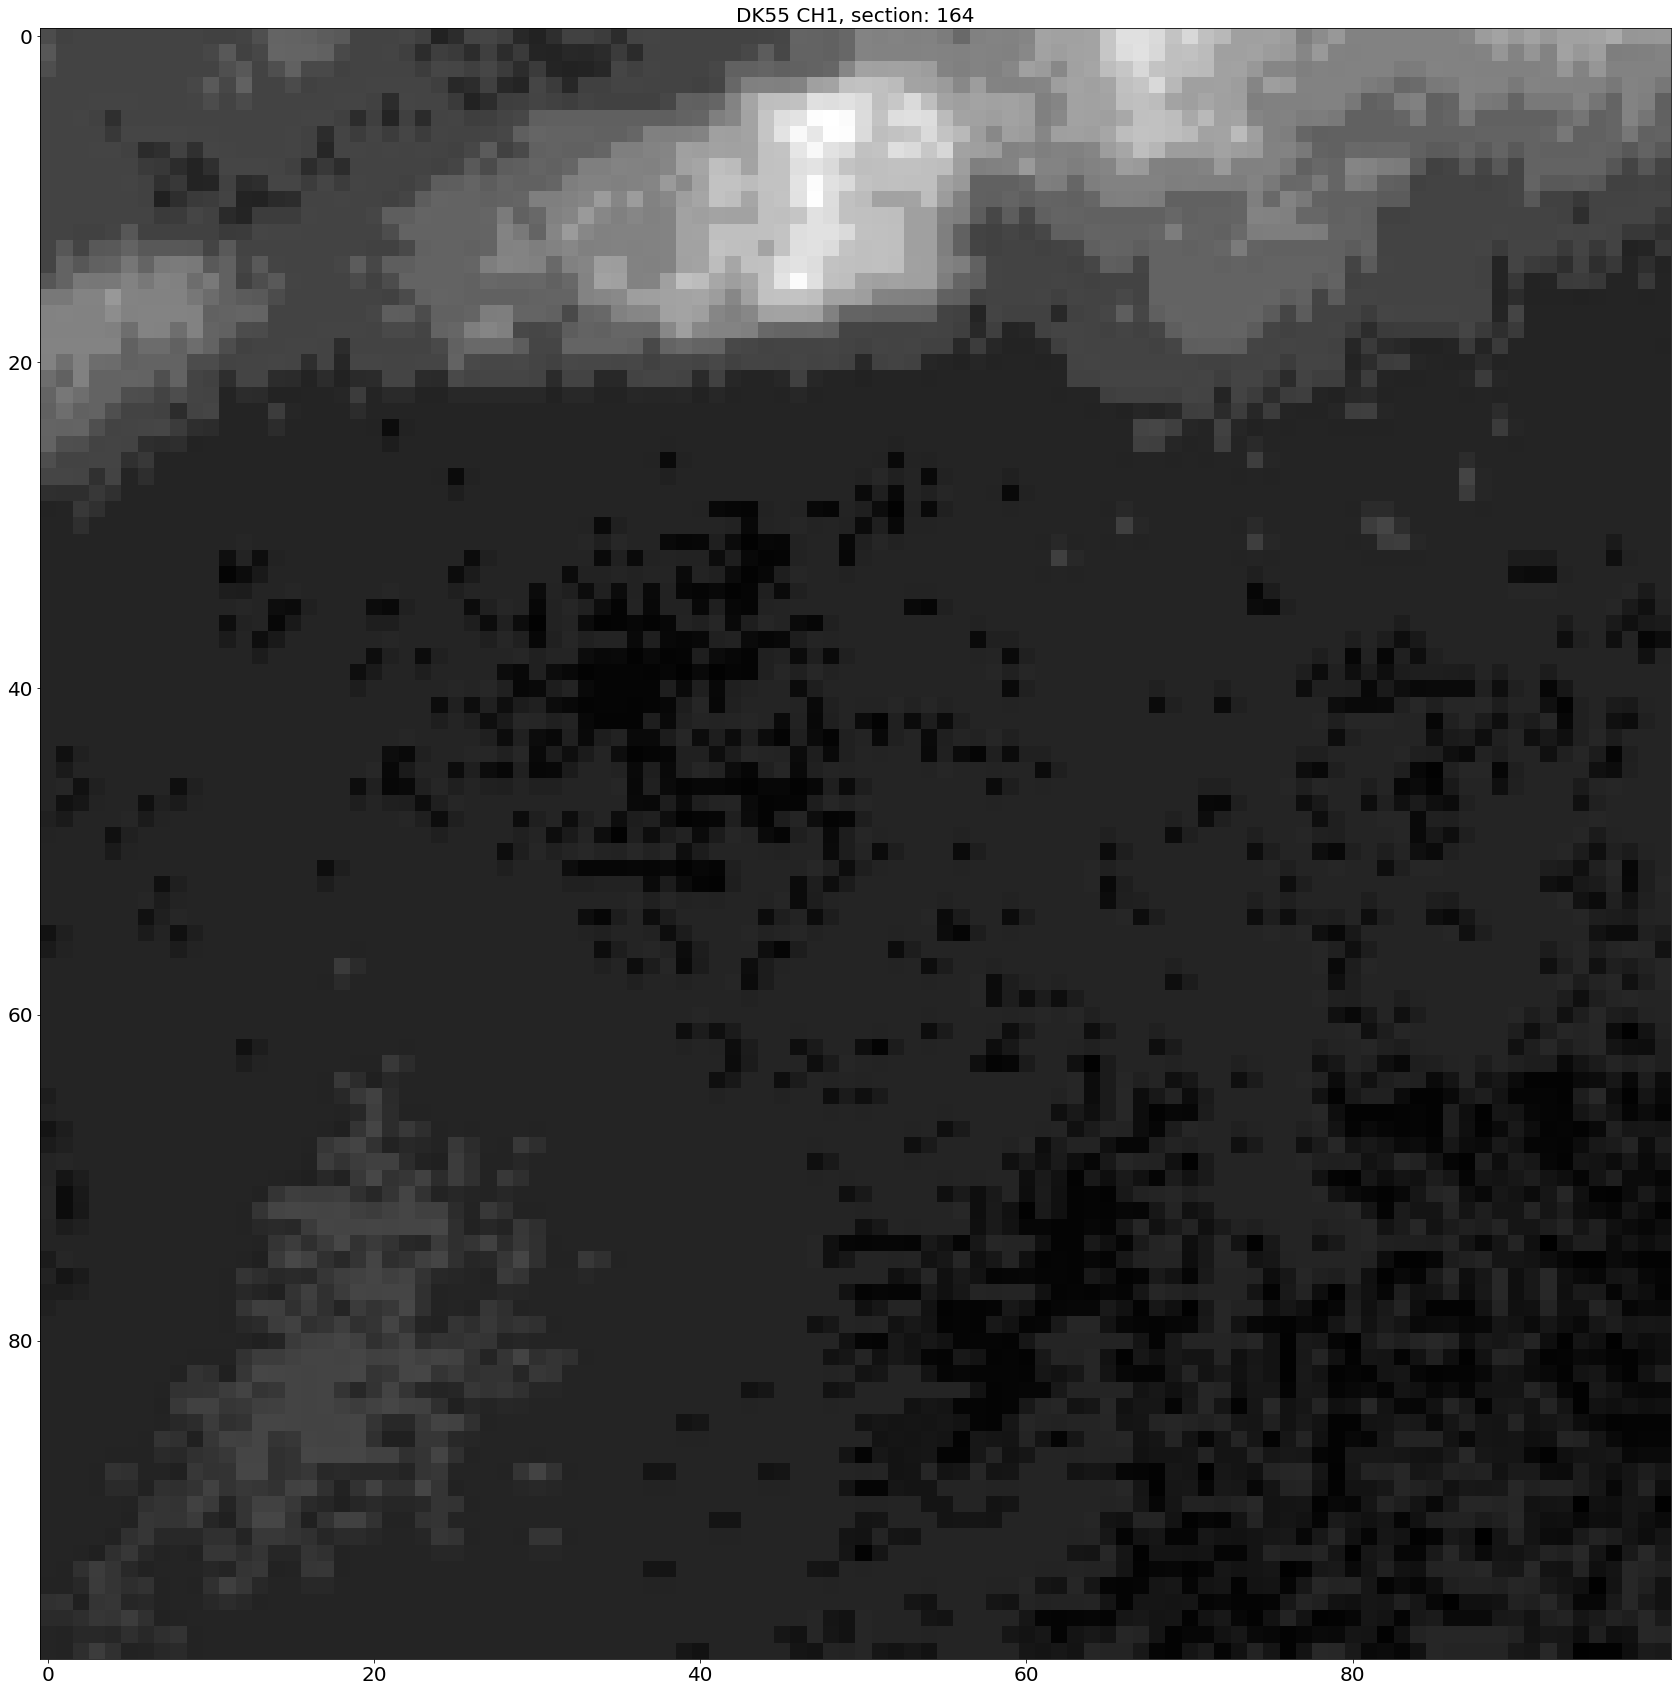

In [141]:
show_image(vimg,_title=f'{animal} CH1, section: {section}',fsize=[30,30])

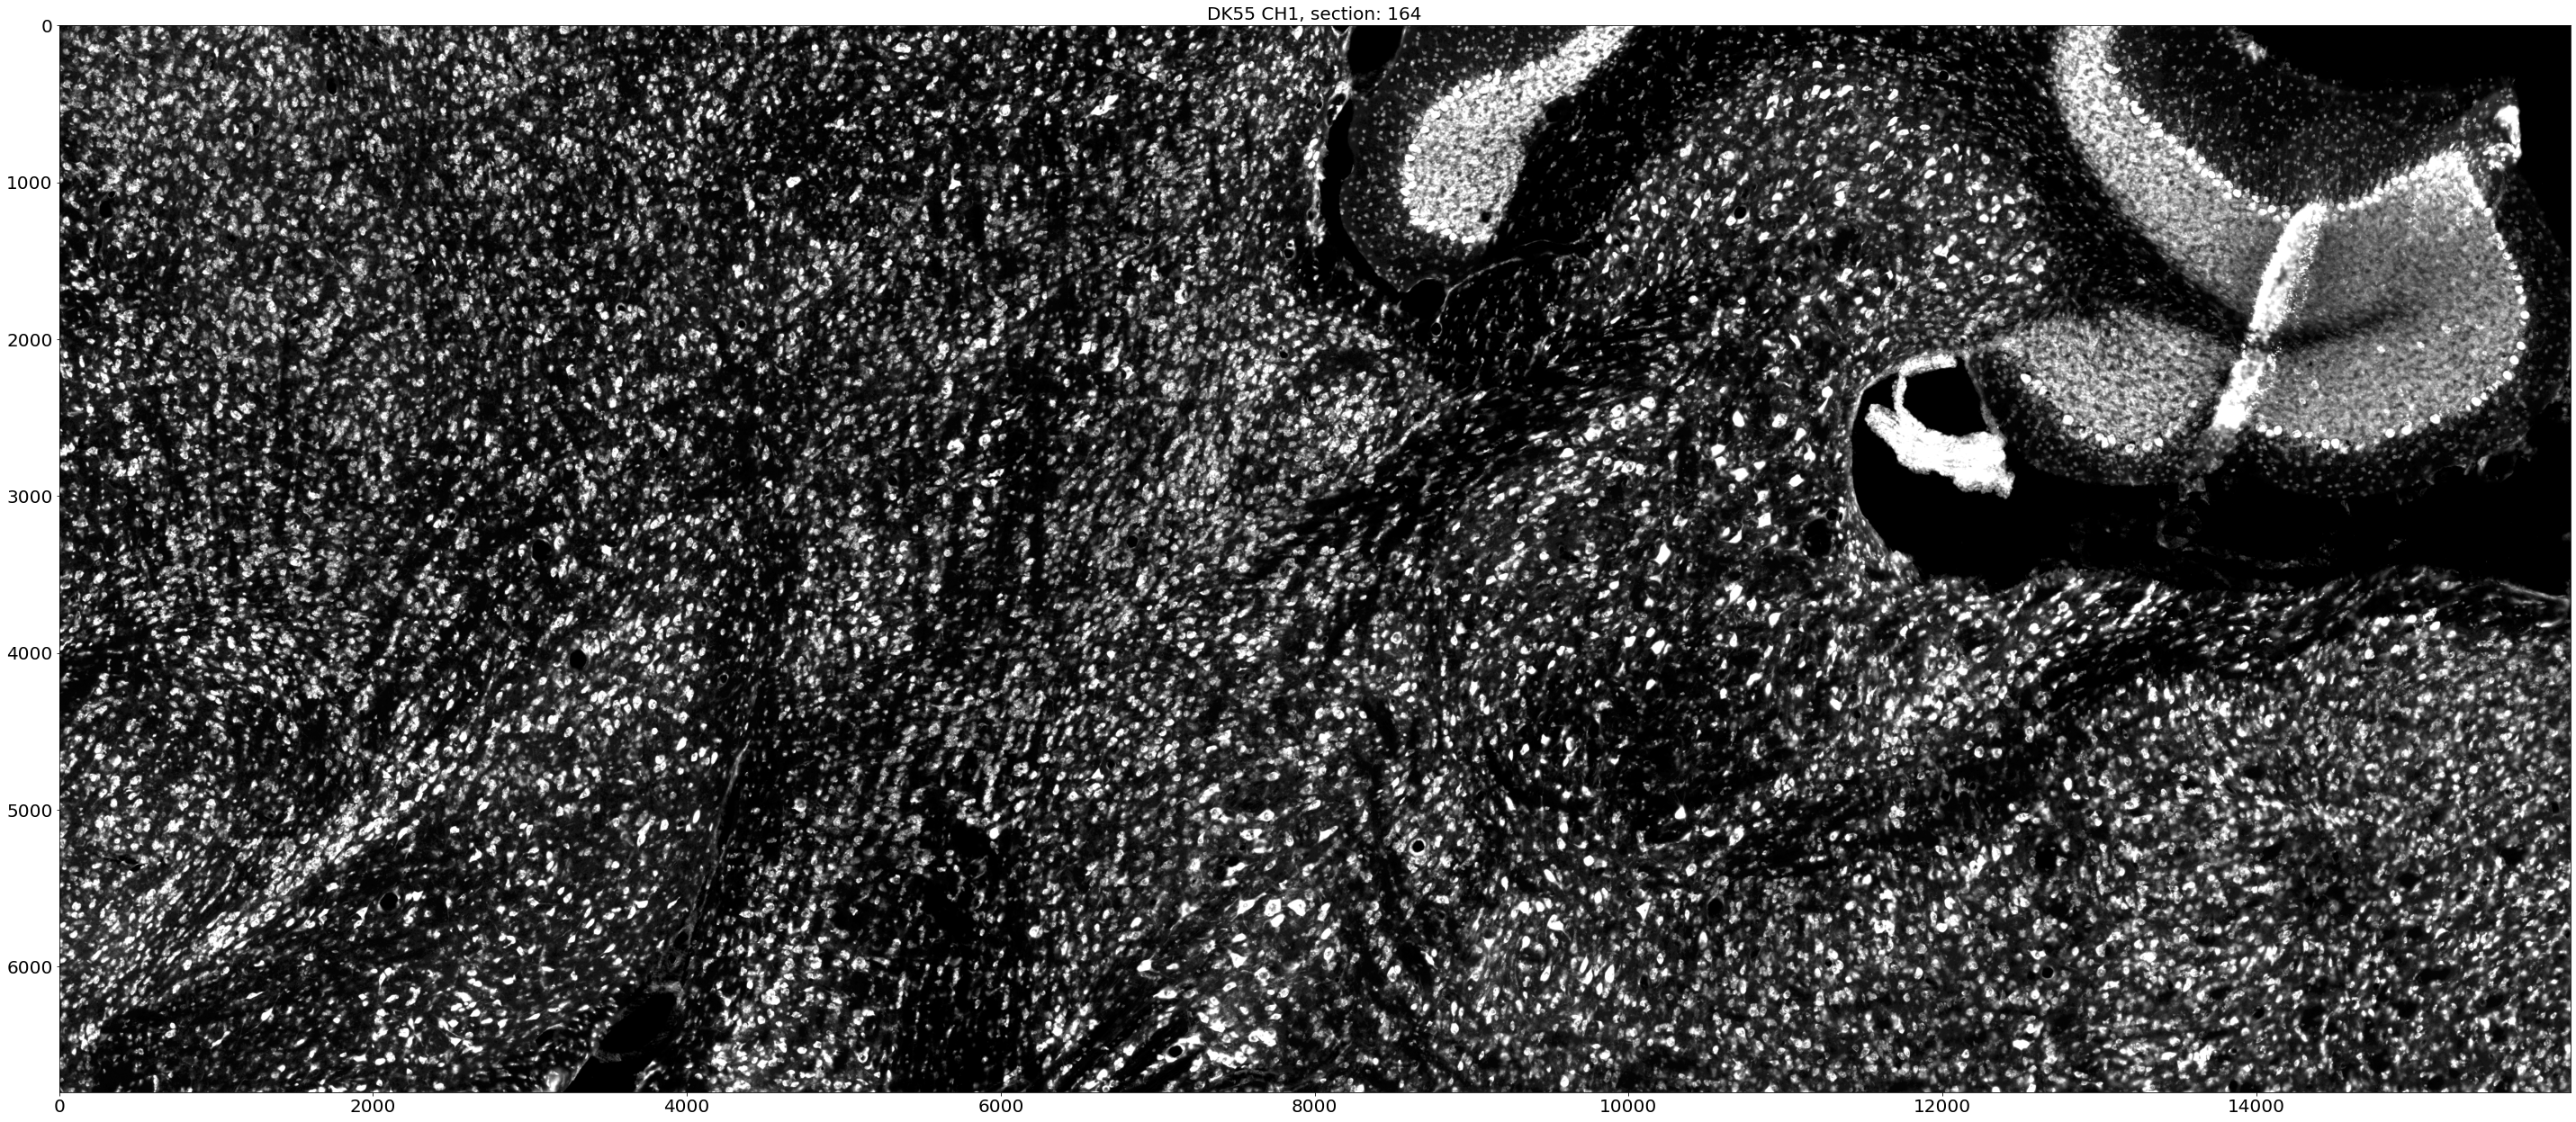

In [111]:
top_clip=30000
bottom_clip=5000
cimg=copy(vimg)
cimg[cimg>top_clip]=top_clip
cimg[cimg<bottom_clip]=bottom_clip
show_image(cimg,_title=f'{animal} CH1, section: {section}',fsize=[50,50])

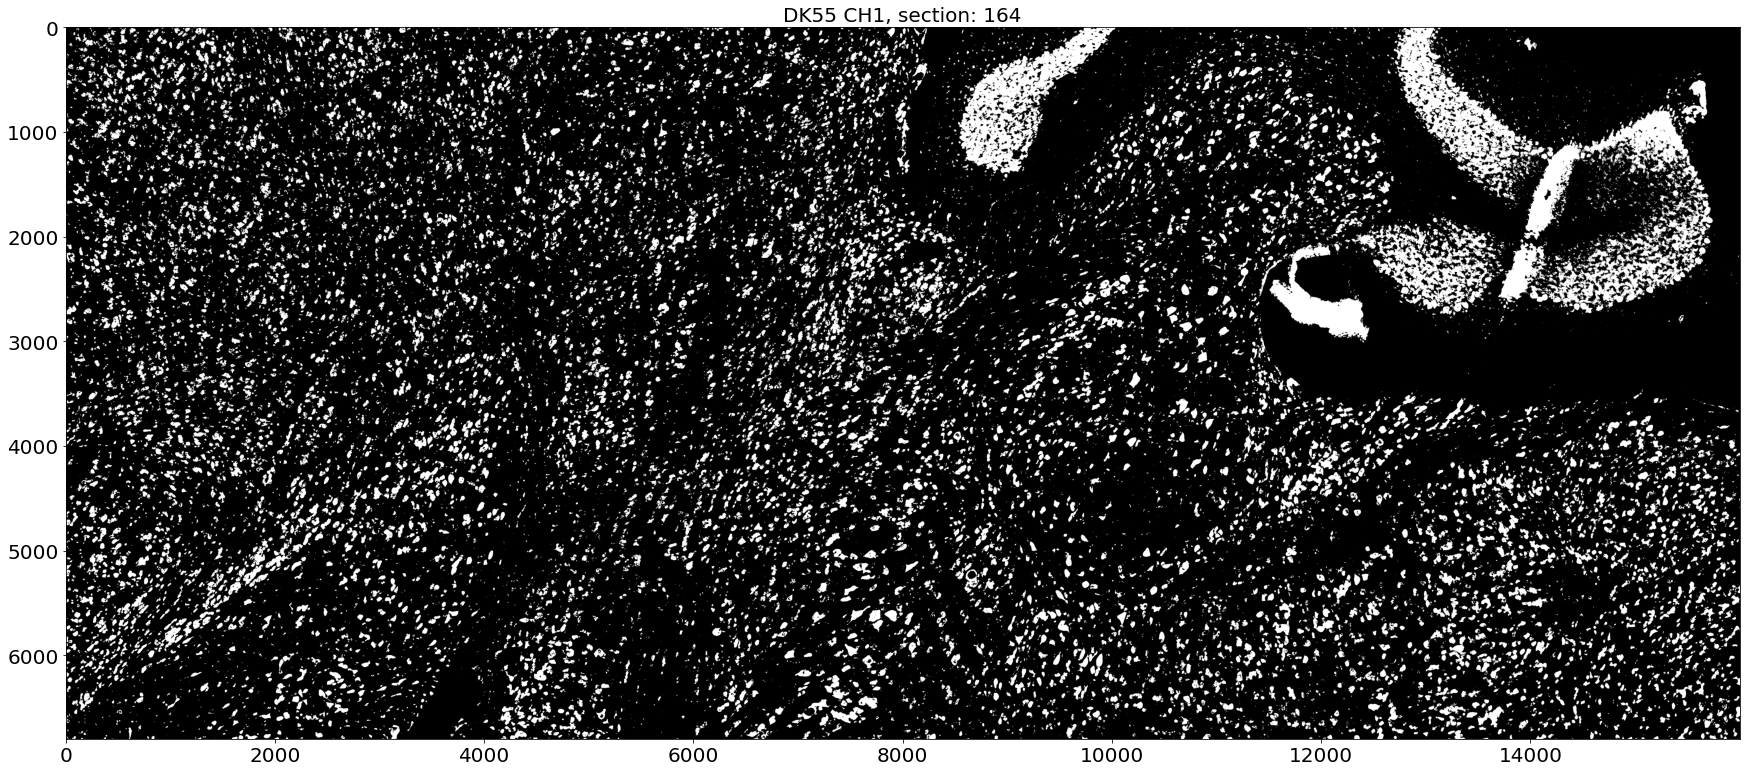

In [101]:

show_image(vimg>18000,_title=f'{animal} CH1, section: {section}',fsize=[30,30])

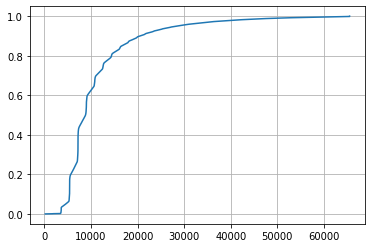

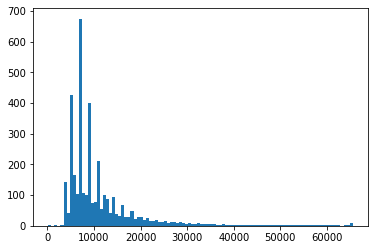

In [86]:
plot_dist(vimg)

In [82]:
def plot_dist(uimg):
    H=uimg.flatten()
    H=np.sort(H)

    H=H[0:-1:1000]
    plt.figure()
    plt.plot(H,np.arange(0,1,1./H.shape[0]))
    plt.grid()
    plt.figure()
    plt.hist(H,bins=100);

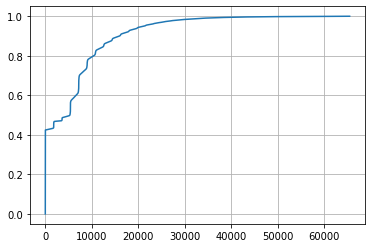

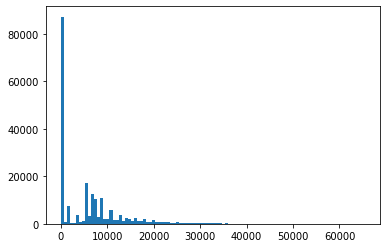

In [83]:
plot_dist(img)

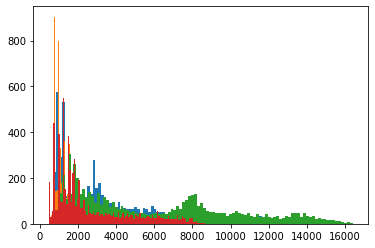

In [14]:
for i in [10,20,30,40]:
    plt.hist(positives[i][2].flatten(),bins=100);

In [112]:
thresholds=[5000,10000,15000,20000]

In [121]:
%%time
all_stats=[]
for i in range(len(thresholds)):
    Stats=cv2.connectedComponentsWithStats(np.int8(img>thresholds[i]))
    all_stats.append(Stats)
    print(thresholds[i])

5000
10000
15000
20000
CPU times: user 7.71 s, sys: 5.65 s, total: 13.4 s
Wall time: 1.32 s


In [37]:
col_min,row_min,width,height,area = Stats[2][j,:]

(4795,)

In [136]:
Stats=all_stats[3]
area=Stats[2][:,-1]
area.shape

(47691,)

In [142]:
area=area[area>20]
area=area[area<1000]
area.shape

(13087,)

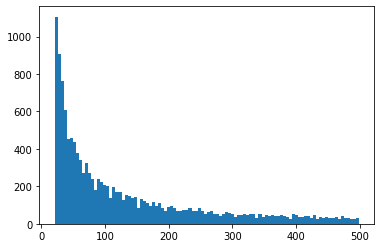

In [143]:
hist(area,bins=100);